In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import cv2 as cv
from fer import FER

In [ ]:
df  = pd.read_csv('c:/data/age_gender.csv')
df.shape

(23705, 5)

In [ ]:
df.head()

,age,race,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
df.gender = df.gender.apply(lambda x: 'male' if x==0 else 'female')
df.head()

,age,race,gender,img_name,pixels
0,1,2,male,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,male,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,male,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,male,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,male,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
df.gender.value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

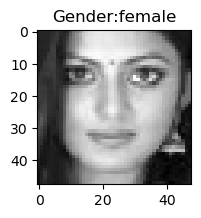

In [ ]:
plt.figure(figsize=[2,2])
k=np.random.randint(23705)
px =np.array(df.pixels[k].split(),dtype='int32').reshape(48,48)
plt.imshow(px,cmap='gray')
plt.title(f'Gender:{df.gender[k]}')
plt.show()

In [ ]:
df.pixels = df.pixels.apply(lambda x: np.array(x.split(),dtype='int32').reshape(48,48))
df.head()

,age,race,gender,img_name,pixels
0,1,2,male,20161219203650636.jpg.chip.jpg,"[[129, 128, 128, 126, 127, 130, 133, 135, 139,..."
1,1,2,male,20161219222752047.jpg.chip.jpg,"[[164, 74, 111, 168, 169, 171, 175, 182, 184, ..."
2,1,2,male,20161219222832191.jpg.chip.jpg,"[[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116..."
3,1,2,male,20161220144911423.jpg.chip.jpg,"[[193, 197, 198, 200, 199, 200, 202, 203, 204,..."
4,1,2,male,20161220144914327.jpg.chip.jpg,"[[202, 205, 209, 210, 209, 209, 210, 211, 212,..."


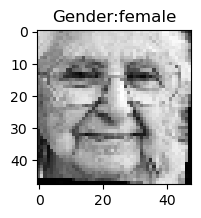

In [ ]:
plt.figure(figsize=[2,2])
k=np.random.randint(23705)
plt.imshow(df.pixels[k],cmap='gray')
plt.title(f'Gender:{df.gender[k]}')
plt.show()

In [ ]:
X  = np.zeros((23705,48,48))
X

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
for i in range(23705):
    X[i]=df.pixels[i]

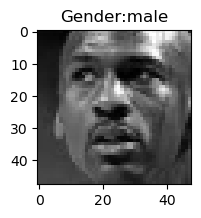

In [ ]:
plt.figure(figsize=[2,2])
k=np.random.randint(23705)
plt.imshow(X[k],cmap='gray')
plt.title(f'Gender:{df.gender[k]}')
plt.show()

In [ ]:
X.shape

(23705, 48, 48)

In [ ]:
def plot_images(nrows,ncols):
    plt.figure(figsize=[12,4])
    for i in range(1,nrows*ncols+1):
        plt.subplot(nrows,ncols,i)
        k=np.random.randint(23705)
        plt.imshow(X[k],cmap='gray')
        plt.title(f'{df.gender[k]}',fontsize='small')
        plt.axis('off')
    plt.show()


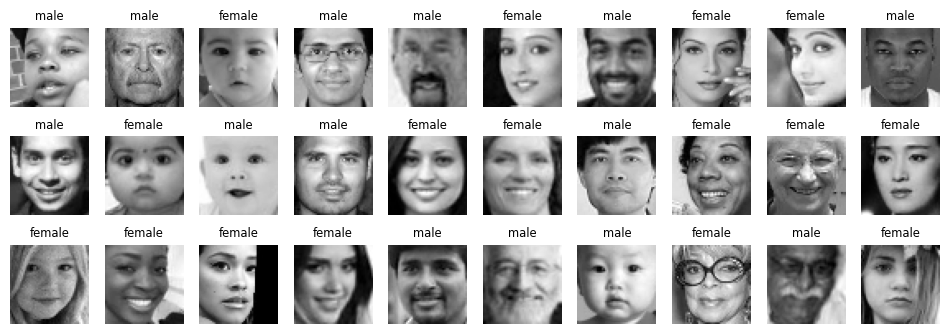

In [ ]:
plot_images(3,10)

In [ ]:
y=df['gender']
y

0          male
1          male
2          male
3          male
4          male
          ...  
23700    female
23701    female
23702    female
23703    female
23704    female
Name: gender, Length: 23705, dtype: object

In [ ]:
y = pd.get_dummies(y,dtype='int32')


In [ ]:
y

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23700,1,0
23701,1,0
23702,1,0
23703,1,0


In [ ]:
X.shape,y.shape

((23705, 48, 48), (23705, 2))

In [ ]:
model = Sequential()


model.add(Flatten(input_shape=(48,48)))


model.add(Dense(units=100,use_bias=True))
model.add(Activation('relu'))

model.add(Dense(200,use_bias=True))
model.add(Activation('relu'))

model.add(Dense(400,use_bias=True))
model.add(Activation('relu'))

model.add(Dense(800,use_bias=True))
model.add(Activation('relu'))


model.add(Dense(800,use_bias=True))
model.add(Activation('relu'))

model.add(Dense(2,use_bias=True))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_11 (Dense)            (None, 100)               230500    
                                                                 
 activation_11 (Activation)  (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 200)               20200     
                                                                 
 activation_12 (Activation)  (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 400)               80400     
                                                                 
 activation_13 (Activation)  (None, 400)              

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1000,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22705, 48, 48), (1000, 48, 48), (22705, 2), (1000, 2))

In [ ]:
(22705*0.9)/64

319.2890625

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
284/284 [==============================] - 12s 43ms/step - loss: 0.4247 - accuracy: 0.8147 - val_loss: 0.4051 - val_accuracy: 0.8320
Epoch 2/10
284/284 [==============================] - 12s 41ms/step - loss: 0.4403 - accuracy: 0.8026 - val_loss: 0.4345 - val_accuracy: 0.8210
Epoch 3/10
 38/284 [===>..........................] - ETA: 12s - loss: 0.3886 - accuracy: 0.8265

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 7ms/step - loss: 0.4022 - accuracy: 0.8320


[0.4022243916988373, 0.8320000171661377]

In [ ]:
y_predict = model.predict(X_test)
y_predict

32/32 [==============================] - 0s 8ms/step


array([[0.06436487, 0.935427  ],
       [0.33685616, 0.6648771 ],
       [0.80017495, 0.20014155],
       ...,
       [0.97460467, 0.02507956],
       [0.06436487, 0.935427  ],
       [0.06436487, 0.935427  ]], dtype=float32)

In [ ]:
y_predict = np.array([np.argmax(i) for i in y_predict])
y_predict

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
y_true = np.array([np.argmax(i) for i in y_test.values])
y_true

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

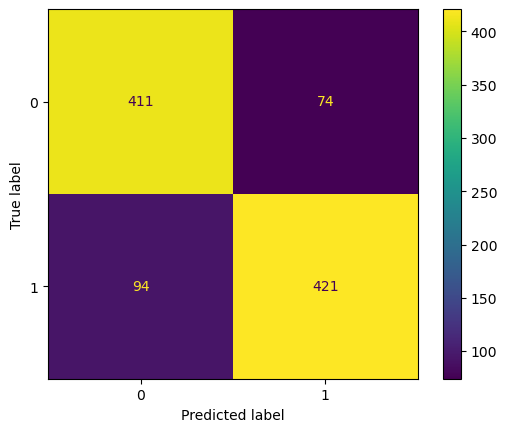

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true,y_predict)
plt.show()

In [ ]:
(411+421)/1000

0.832

In [ ]:
genders=['female','male']

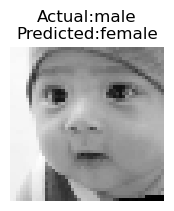

In [ ]:
plt.figure(figsize=[2,2])
k=np.random.randint(1000)
plt.imshow(X_test[k],cmap='gray')
plt.title(f'Actual:{genders[y_true[k]]}\nPredicted:{genders[y_predict[k]]}')
plt.axis('off')
plt.show()

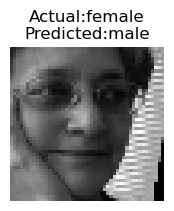

In [ ]:
plt.figure(figsize=[2,2])
k=np.random.randint(1000)
plt.imshow(X_test[k],cmap='gray')
plt.title(f'Actual:{genders[y_true[k]]}\nPredicted:{genders[y_predict[k]]}')
plt.axis('off')
plt.show()

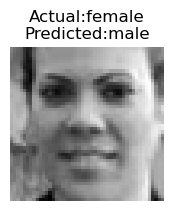

In [ ]:
plt.figure(figsize=[2,2])
k=np.random.randint(1000)
plt.imshow(X_test[k],cmap='gray')
plt.title(f'Actual:{genders[y_true[k]]}\nPredicted:{genders[y_predict[k]]}')
plt.axis('off')
plt.show()

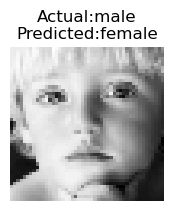

In [ ]:
plt.figure(figsize=[2,2])
k=np.random.randint(1000)
plt.imshow(X_test[k],cmap='gray')
plt.title(f'Actual:{genders[y_true[k]]}\nPredicted:{genders[y_predict[k]]}')
plt.axis('off')
plt.show()

In [ ]:
px_bgr = cv.imread('c:/images/aish.jpg')
px_rgb = cv.cvtColor(px_bgr,cv.COLOR_BGR2RGB)
px_rgb.shape

(738, 1200, 3)

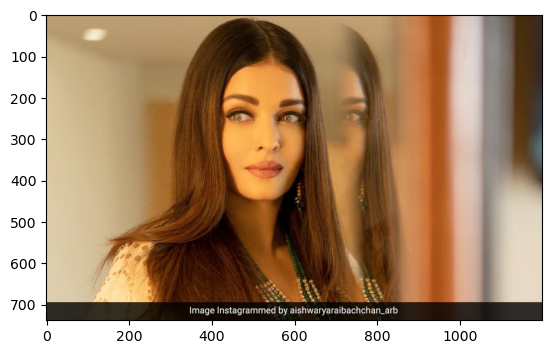

In [ ]:
plt.imshow(px_rgb)
plt.show()

In [ ]:
fd = FER()
x,y,w,h=fd.find_faces(px_rgb)[0]

In [ ]:
px_face = px_rgb[y:y+h,x:x+w]
px_face.shape

(314, 314, 3)

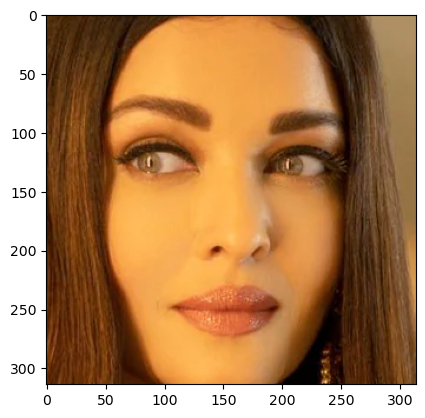

In [ ]:
plt.imshow(px_face)
plt.show()

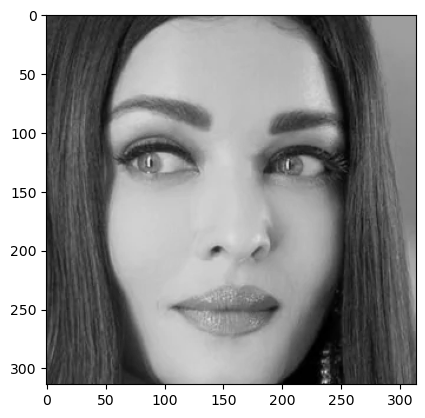

In [ ]:
px_gray = cv.cvtColor(px_face,cv.COLOR_RGB2GRAY)
plt.imshow(px_gray,cmap='gray')
plt.show()

In [ ]:
px_final = cv.resize(px_gray,(48,48))

In [ ]:
y_predict =[np.argmax(i) for i in model.predict(px_final.reshape(1,48,48))][0]
y_predict

1/1 [==============================] - 0s 40ms/step


0

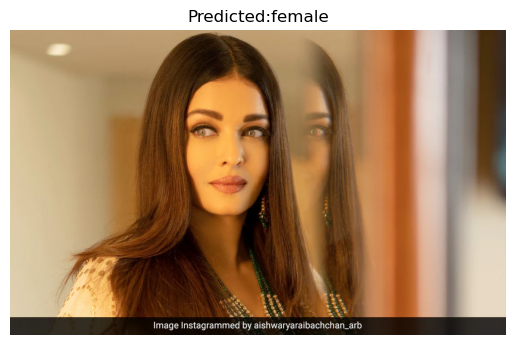

In [ ]:
plt.imshow(px_rgb)
plt.title(f'Predicted:{genders[y_predict]}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 67ms/step


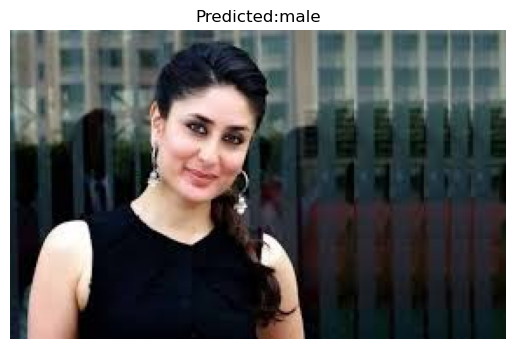

In [ ]:
px_bgr = cv.imread('c:/images/actress.jpg')
px_rgb = cv.cvtColor(px_bgr,cv.COLOR_BGR2RGB)
x,y,w,h=fd.find_faces(px_rgb)[0]
px_face = px_rgb[y:y+h,x:x+w]
px_gray = cv.cvtColor(px_face,cv.COLOR_RGB2GRAY)
px_final = cv.resize(px_gray,(48,48))
y_predict =[np.argmax(i) for i in model.predict(px_final.reshape(1,48,48))][0]
plt.imshow(px_rgb)
plt.title(f'Predicted:{genders[y_predict]}')
plt.axis('off')
plt.show()